<a href="https://colab.research.google.com/github/madfrantic/helloworld/blob/main/project01b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello world Project01

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/madfrantic/helloworld/refs/heads/main/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
)

schools = df.copy()

print("Dataset Info:")
schools.info()

print("\nFirst 5 rows:")
display(schools.head(5))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
print("\nList of Schools:")
for school in schools["School Name"].unique():
    print(school)


List of Schools:
P.S. 034 Franklin D. Roosevelt
P.S. 140 Nathan Straus
P.S. 184m Shuang Wen
P.S. 188 The Island School
Orchard Collegiate Academy
Technology, Arts, and Sciences Studio
University Neighborhood Middle School
Collaborative Academy of Science, Technology, & La
School for Global Leaders
University Neighborhood High School
East Side Community School
Forsyth Satellite Academy
Marta Valle High School
Lower East Side Preparatory High School
New Explorations into Science, Technology and Math
Cascades High School
Bard High School Early College
Tompkins Square Middle School
47 The American Sign Language and English Secondar
J.H.S. 104 Simon Baruch
P.S. 111 Adolph S. Ochs
East Side Middle School
P.S. 126 Jacob August Riis
M.S. 131
The Urban Assembly School for Emergency Management
Stephen T. Mather Building Arts & Craftsmanship Hi
J.H.S. 167 Robert F. Wagner
Yorkville East Middle School
P.S./I.S. 217 Roosevelt Island
M.S. 255 Salk School of Science
M.S. 260 Clinton School Writers &

In [ ]:

schools_qc = schools[schools["School Name"].str.contains("Art and Design High School", na=False)]
print("\nArt and Design High School Rows:")
display(schools_qc.head())

# Filter to year 2016
schools_qc_2016 = schools_qc[schools_qc["Year"].astype(str) == "2016"]
print("\nArt and Design High School 2016 Data:")
display(schools_qc_2016)



Art and Design High School Rows:


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
2288,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2015,238,54.9,164,68.9,74,31.1,14,5.9,14,5.9
2289,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2016,237,50.1,186,78.5,51,21.5,13,5.5,13,5.5
2290,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2017,27,43.2,24,88.9,3,11.1,0,0,0,0
2291,02M630,Art and Design High School,High school,Common Core Algebra,2015,458,63.3,204,44.5,254,55.5,1,0.2,86,18.8
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3



Art and Design High School 2016 Data:


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
2289,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2016,237,50.1,186,78.5,51,21.5,13,5.5,13,5.5
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3
2294,02M630,Art and Design High School,High school,Common Core Algebra2,2016,159,56.6,119,74.8,40,25.2,1,0.6,40,25.2
2297,02M630,Art and Design High School,High school,Common Core English,2016,323,77.8,45,13.9,278,86.1,196,60.7,223,69
2300,02M630,Art and Design High School,High school,Common Core Geometry,2016,402,63.6,191,47.5,211,52.5,26,6.5,142,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149290,02M630,Art and Design High School,High school,U.S. History and Government,2016,25,s,s,s,s,s,s,s,na,na
149291,02M630,Art and Design High School,High school,U.S. History and Government,2016,81,79.7,7,8.6,74,91.4,49,60.5,na,na
149292,02M630,Art and Design High School,High school,U.S. History and Government,2016,184,78.3,29,15.8,155,84.2,111,60.3,na,na
149293,02M630,Art and Design High School,High school,U.S. History and Government,2016,4,s,s,s,s,s,s,s,na,na


In [ ]:

# Drop null rows
schools_qc_2016 = schools_qc_2016.dropna(axis=0)
print("\nAfter dropping nulls:")
schools_qc_2016.info()

# Remove rows where Mean Score is 's'
schools_qc_2016 = schools_qc_2016[schools_qc_2016["Mean Score"] != "s"].copy()

# Convert Mean Score to float
schools_qc_2016["Mean Score"] = schools_qc_2016["Mean Score"].astype(float)

# Remove very low scores (<70)
schools_qc_2016 = schools_qc_2016[schools_qc_2016["Mean Score"] > 70]

# Sort by score
schools_qc_2016 = schools_qc_2016.sort_values(by="Mean Score")

print("\nCleaned Art and Design High School 2016 Data:")
display(schools_qc_2016)




After dropping nulls:
<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 2289 to 149294
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School DBN                   174 non-null    object
 1   School Name                  174 non-null    object
 2   School Level                 174 non-null    object
 3   Regents Exam                 174 non-null    object
 4   Year                         174 non-null    int64 
 5   Total Tested                 174 non-null    int64 
 6   Mean Score                   174 non-null    object
 7   Number Scoring Below 65      174 non-null    object
 8   Percent Scoring Below 65     174 non-null    object
 9   Number Scoring 65 or Above   174 non-null    object
 10  Percent Scoring 65 or Above  174 non-null    object
 11  Number Scoring 80 or Above   174 non-null    object
 12  Percent Scoring 80 or Above  174 non-null    object
 13  Number Scor

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
23633,02M630,Art and Design High School,High school,English,2016,17,70.2,4,23.5,13,76.5,4,23.5,7,41.2
149139,02M630,Art and Design High School,High school,Common Core Algebra,2016,211,70.2,51,24.2,160,75.8,34,16.1,129,61.1
149246,02M630,Art and Design High School,High school,Physical Settings/Chemistry,2016,18,70.6,5,27.8,13,72.2,3,16.7,na,na
149138,02M630,Art and Design High School,High school,Common Core Algebra,2016,76,70.6,20,26.3,56,73.7,15,19.7,46,60.5
23641,02M630,Art and Design High School,High school,Global History and Geography,2016,397,70.8,108,27.2,289,72.8,113,28.5,na,na
107246,02M630,Art and Design High School,High school,Common Core Algebra,2016,152,70.9,36,23.7,116,76.3,27,17.8,101,66.4
107282,02M630,Art and Design High School,High school,Integrated Algebra,2016,21,70.9,5,23.8,16,76.2,5,23.8,5,23.8
149223,02M630,Art and Design High School,High school,Integrated Algebra,2016,41,71.0,10,24.4,31,75.6,10,24.4,10,24.4
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3
60067,02M630,Art and Design High School,High school,Integrated Algebra,2016,37,71.4,10,27,27,73,10,27,10,27


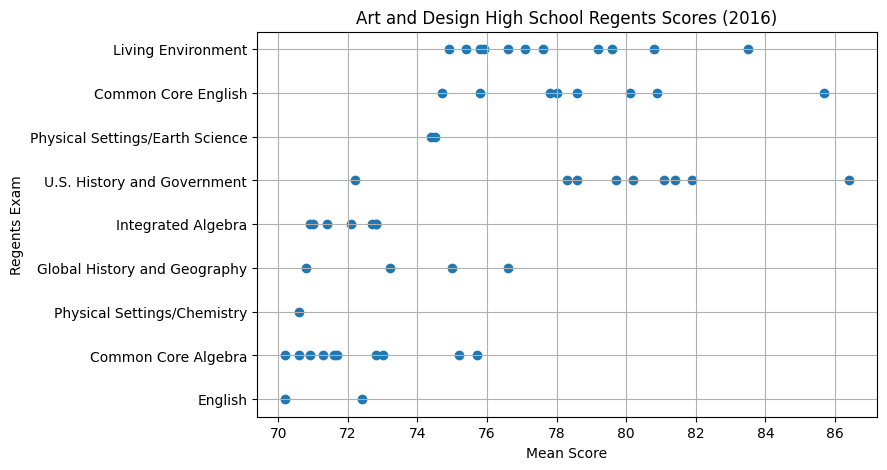

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(schools_qc_2016["Mean Score"], schools_qc_2016["Regents Exam"])
plt.title("Art and Design High School Regents Scores (2016)")
plt.xlabel("Mean Score")
plt.ylabel("Regents Exam")
plt.grid(True)
plt.show()


In [ ]:
# Clean 's' values
schools = schools[schools["Mean Score"] != "s"].copy()

# Restrict to secondary schools only
schools = schools[schools["School Level"] == "High school"]

# Restrict to 2017 only
schools = schools[schools["Year"].astype(str) == "2016"]

# Convert Mean Score to float
schools["Mean Score"] = schools["Mean Score"].astype(float)

# Filter out low outlier scores
schools = schools[schools["Mean Score"] > 70].copy()

# Compute mean score for each school
schools_avg = schools.groupby("School Name")["Mean Score"].mean().sort_values()

print("\nAverage Regents High School Scores Across Schools:")
display(schools_avg)


Average Regents High School Scores Across Schools:


,Mean Score
School Name,
Bronx Engineering and Technology Academy,70.100000
Abraham Lincoln Yabc,70.100000
Epic High School - South,70.200000
Mott Haven Community High School,70.200000
The Brooklyn Academy of Global Finance,70.300000
...,...
High School of American Studies at Lehman College,88.044286
Queens High School for the Sciences at York Colleg,88.340741
Bronx High School of Science,88.928947


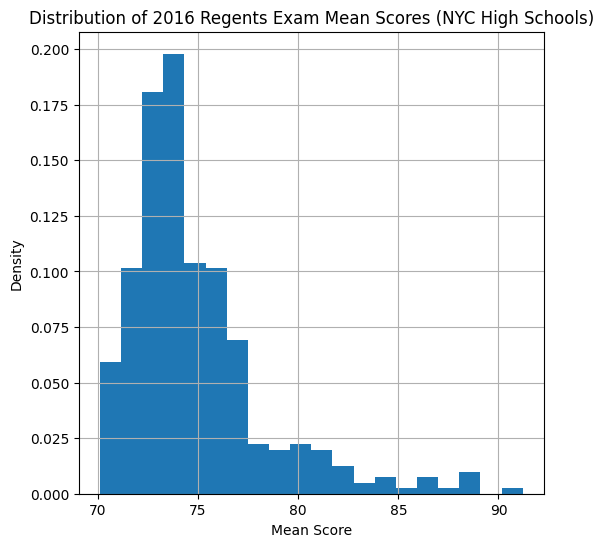

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(schools_avg, bins=20, density=True)
plt.title("Distribution of 2016 Regents Exam Mean Scores (NYC High Schools)")
plt.xlabel("Mean Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
print("\nDescriptive statistics for numeric columns:")
print(df.describe())

print("\nValue counts for school_name:")
print(df['school_name'].value_counts())

print("\nValue counts for school_level:")
print(df['school_level'].value_counts())

print("\nValue counts for regents_exam:")
print(df['regents_exam'].value_counts())

print("\nValue counts for year:")
print(df['year'].value_counts())


Descriptive statistics for numeric columns:
                Year   Total Tested
count  212331.000000  212331.000000
mean     2015.956069      49.364200
std         0.799726      93.023576
min      2015.000000       1.000000
25%      2015.000000       5.000000
50%      2016.000000      20.000000
75%      2017.000000      57.000000
max      2017.000000    1729.000000

Value counts for school_name:


KeyError: 'school_name'